900 900 b'ttt_20181220183609.jpg' b'jpeg' 0.7911111 0.87666667 0.5644444 0.67333335 b'yee' 1


/root/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


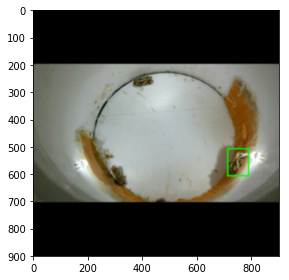

900 900 b'ttt_20181220183609.jpg' b'jpeg' 0.39777777 0.49666667 0.26 0.32333332 b'yee' 1


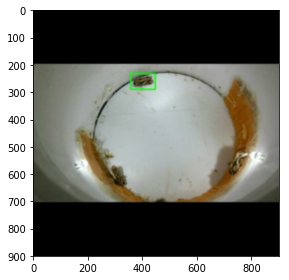

900 900 b'ttt_20181220183609.jpg' b'jpeg' 0.30444443 0.37777779 0.6288889 0.72333336 b'yee' 1


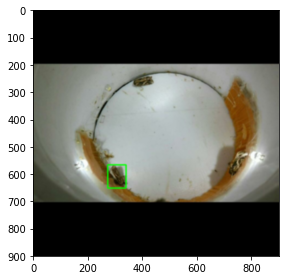

900 900 b'ttt_20181219123456.jpg' b'jpeg' 0.30555555 0.4077778 0.29222223 0.37 b'yee' 1


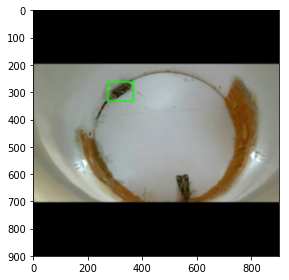

900 900 b'ttt_20181219123456.jpg' b'jpeg' 0.5711111 0.6622222 0.6588889 0.77666664 b'yee' 1


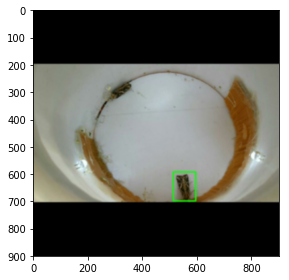

900 900 b'ttt_20181223073840.jpg' b'jpeg' 0.7822222 0.8322222 0.45555556 0.55222225 b'yee' 1


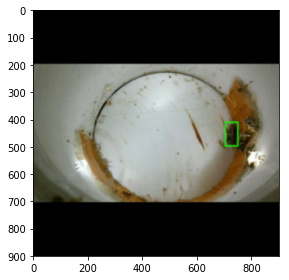

900 900 b'ttt_20181223073840.jpg' b'jpeg' 0.8488889 0.9488889 0.41222224 0.51111114 b'yee' 1


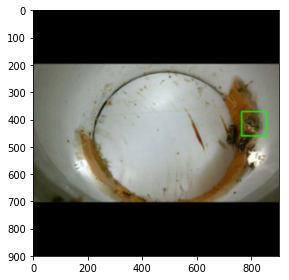

900 900 b'ttt_20181223073840.jpg' b'jpeg' 0.8277778 0.8877778 0.47333333 0.5733333 b'yee' 1


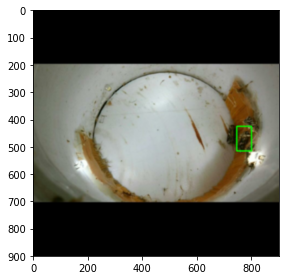

900 900 b'ttt_20181223073840.jpg' b'jpeg' 0.85555553 0.9177778 0.53444445 0.6533333 b'yee' 1


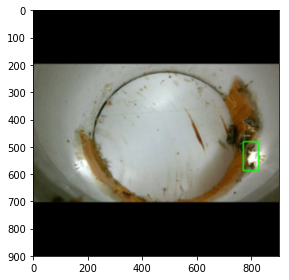

900 900 b'ttt_20181222103746.jpg' b'jpeg' 0.2822222 0.36777776 0.30666667 0.4077778 b'yee' 1


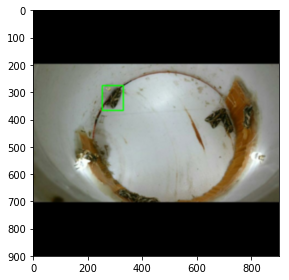

900 900 b'ttt_20181222103746.jpg' b'jpeg' 0.17777778 0.27 0.5511111 0.6288889 b'yee' 1


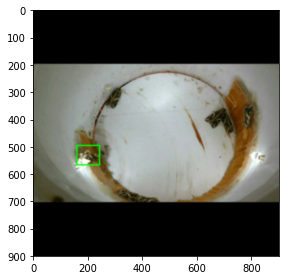

900 900 b'ttt_20181222103746.jpg' b'jpeg' 0.6888889 0.78555554 0.37222221 0.4911111 b'yee' 1


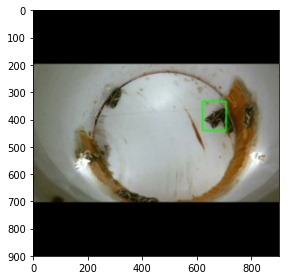

900 900 b'ttt_20181222103746.jpg' b'jpeg' 0.7633333 0.82 0.39222223 0.5 b'yee' 1


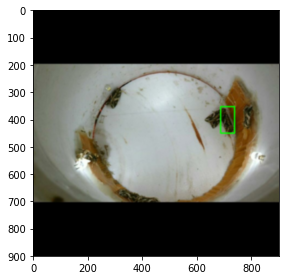

900 900 b'ttt_20181222103746.jpg' b'jpeg' 0.8466667 0.8988889 0.38 0.49333334 b'yee' 1


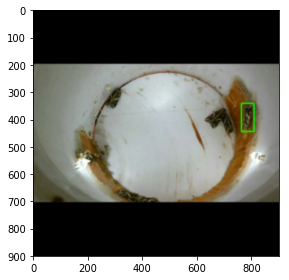

900 900 b'ttt_20181222103746.jpg' b'jpeg' 0.34111112 0.43888888 0.7177778 0.7733333 b'yee' 1


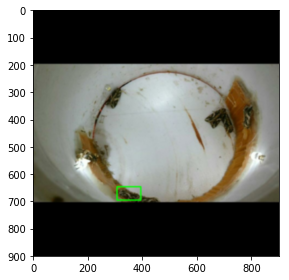

900 900 b'ttt_20181222063736.jpg' b'jpeg' 0.64555556 0.7488889 0.5655556 0.6311111 b'yee' 1


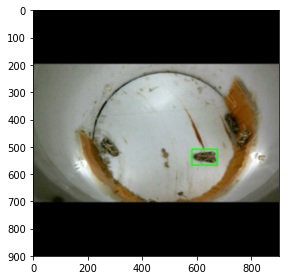

900 900 b'ttt_20181222063736.jpg' b'jpeg' 0.7677778 0.83666664 0.41222224 0.5011111 b'yee' 1


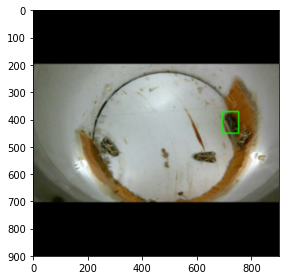

900 900 b'ttt_20181222063736.jpg' b'jpeg' 0.81 0.89444447 0.46222222 0.56777775 b'yee' 1


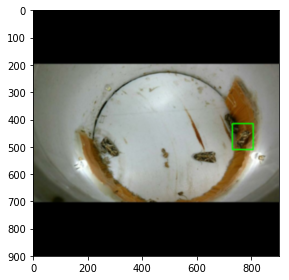

900 900 b'ttt_20181222063736.jpg' b'jpeg' 0.26333332 0.35222223 0.50666666 0.60444444 b'yee' 1


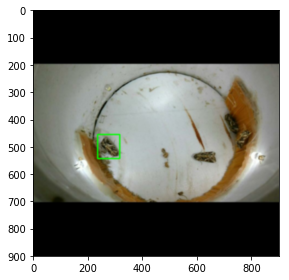

900 900 b'ttt_20181221113650.jpg' b'jpeg' 0.7688889 0.82222223 0.31333333 0.3988889 b'yee' 1


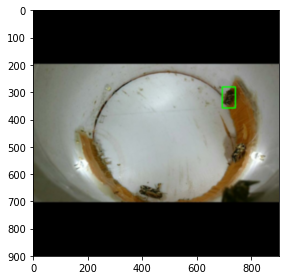

In [2]:
import tensorflow as tf
import numpy as np
import os
import skimage.io as io
import cv2
tfrecords_filename = "train.record"

filename_queue = tf.train.string_input_producer([tfrecords_filename]) 
reader = tf.TFRecordReader()
_, serialized_example = reader.read(filename_queue) 
    
features = tf.parse_single_example(serialized_example,
                                   features={
                                        'image/width':tf.FixedLenFeature([], tf.int64),
                                        'image/height': tf.FixedLenFeature([], tf.int64),
                                        'image/filename':  tf.FixedLenFeature([], tf.string),
                                        'image/source_id': tf.FixedLenFeature([], tf.string),
                                        'image/key/sha256':  tf.FixedLenFeature([], tf.string),
                                        'image/encoded': tf.FixedLenFeature([], tf.string),
                                        'image/format':  tf.FixedLenFeature([], tf.string),
                                        'image/object/bbox/xmin': tf.FixedLenFeature([], tf.float32),
                                        'image/object/bbox/xmax': tf.FixedLenFeature([], tf.float32),
                                        'image/object/bbox/ymin':tf.FixedLenFeature([], tf.float32),
                                        'image/object/bbox/ymax':tf.FixedLenFeature([], tf.float32),
                                        'image/object/class/text':tf.FixedLenFeature([], tf.string),
                                        'image/object/class/label': tf.FixedLenFeature([], tf.int64),
                                   })  

width= tf.cast(features['image/width'], tf.int32)
height = tf.cast(features['image/height'], tf.int32)
filename = tf.cast(features['image/filename'], tf.string)
format = tf.cast(features['image/format'], tf.string)
xmin = tf.cast(features['image/object/bbox/xmin'], tf.float32)
xmax = tf.cast(features['image/object/bbox/xmax'], tf.float32)
ymin = tf.cast(features['image/object/bbox/ymin'], tf.float32)
ymax = tf.cast(features['image/object/bbox/ymax'], tf.float32)
text = tf.cast(features['image/object/class/text'], tf.string)
label = tf.cast(features['image/object/class/label'], tf.int64)

image =tf.image.decode_jpeg(features['image/encoded']);
image = tf.reshape(image,tf.stack([height,width,3]))




with tf.Session() as sess: 
    init_op = tf.initialize_all_variables()
    sess.run(init_op)
    coord=tf.train.Coordinator()
    threads= tf.train.start_queue_runners(coord=coord)
    for i in range(20):
        width1,height1,filename1,format1,xmin1,xmax1,ymin1,ymax1,text1,label1,image1=sess.run([width,height,filename,format,xmin,xmax,ymin,ymax,text,label,image])
        print(width1,height1,filename1,format1,xmin1,xmax1,ymin1,ymax1,text1,label1)
        x1,y1=int(xmin1*width1),int(ymin1*height1)
        x2,y2=int(xmax1*width1),int(ymax1*height1)
        io.imshow(cv2.rectangle(np.array(image1),(x1,y1),(x2,y2),(0,255,0),3), cmap = 'gray', interpolation = 'bicubic')
        io.show()
        
    coord.request_stop()
    coord.join(threads)